# Рк 1
### Тема: Технологии разведочного анализа и обработки данных.
### Секретов К. А. ИУ5-62Б Вариант 15
## Задача №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Для студентов групп ИУ5-62Б, ИУ5Ц-82Б - для произвольной колонки данных построить гистограмму.

In [2]:
import pandas as pd

data = pd.read_csv('googleplaystore.csv', sep=",")

In [5]:
data.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Для обработки пропусков количественного признака выберем колонку Rating

In [14]:
missing_rating_count = data['Rating'].isnull().sum()

total_rating_count = data.shape[0]
print(f"Процент пропущенных значений: {(missing_rating_count / total_rating_count) * 100:.2f}%")

Процент пропущенных значений: 13.60%


Это слишком большой процент пропусков, замещение средним или медианой может привести к искажению данных, лучше удалить эти строки

In [15]:
data.dropna(subset=['Rating'], inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Для обработки пропусков категориального признака выберем колонку Android Ver

In [20]:
missing_rating_count = data['Android Ver'].isnull().sum()

total_rating_count = data.shape[0]
print(f"Процент пропущенных значений: {(missing_rating_count / total_rating_count) * 100:.2f}%")

Процент пропущенных значений: 0.00%


Так как процент пропущенных значений очень мал заменим пропуски на самый нейтральный встречающийся в датасете вариант

In [21]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [25]:
data = data.fillna({'Android Ver': 'Varies with device'})
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

Для построения модели предсказания рейтинга я бы использовал 

Category : Категория приложения может оказывать влияние на его рейтинг. Некоторые категории могут быть более популярны среди пользователей, что может привести к более высокому рейтингу.

Reviews: Количество отзывов может служить индикатором популярности и качества приложения. Обычно, чем больше отзывов у приложения, тем выше его рейтинг.

Installs: Количество установок также может быть важным фактором для рейтинга приложения. Популярные приложения обычно имеют больше установок.

Price: Цена приложения может влиять на его рейтинг. Бесплатные или дешевые приложения могут привлекать больше пользователей и иметь более высокий рейтинг.

Content Rating: Возрастное ограничение также может оказать влияние на рейтинг приложения. Пользователи могут предпочитать приложения с определенным рейтингом контента.

Genres: В этом датасете жанр служит дополнительной подкатегорией, он слабее будет влиять на рейтинг чем основная категория.

Last Updated: Время последнего обновления приложения также может оказывать влияние на его рейтинг. Приложения, которые дольше поддерживаются разработчиками привлекают больше пользователей и могут иметь более высокий рейтинг.

## Гистограмма для колонки Rating:


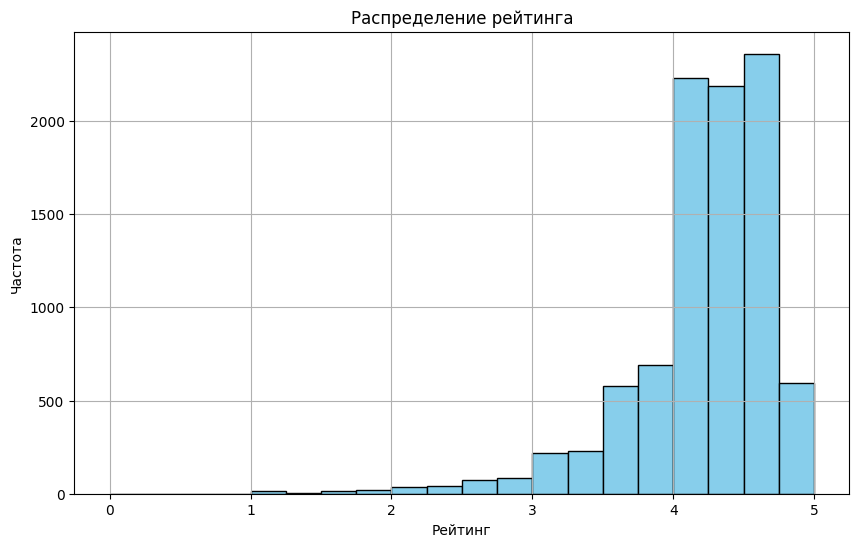

In [28]:
import matplotlib.pyplot as plt
rating = data['Rating']

plt.figure(figsize=(10, 6))
plt.hist(rating, bins=20, range=(0, 5), color='skyblue', edgecolor='black')
plt.title('Распределение рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.xticks(range(6))
plt.grid(True)
plt.show()